Import Library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

Gathering Data

In [15]:
url = 'https://drive.google.com/uc?id=1Jb1qeJFdHapu99p5xWLht_NXHCZ9cScu'
output= 'data.csv'
gdown.download(url, output, quiet=False)
days_df = pd.read_csv(output)
days_df.head()

Downloading...
From: https://drive.google.com/uc?id=1Jb1qeJFdHapu99p5xWLht_NXHCZ9cScu
To: /content/data.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 40.3MB/s]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan info tipe data

In [16]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengubah tipe data dteday dari object menjadi datetime

In [17]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

Mengubah nilai data dari int menjadi string sesuai dengan ketentuan sumber dataset

In [18]:
days_df.replace({

       "season": {1:"springer", 2:"summer", 3:"fall", 4:"winter"}

}, inplace=True)

In [19]:
days_df.replace({

       "yr": {0:"2011", 1:"2012"}

}, inplace=True)

In [20]:
days_df.replace({

  "weekday": {0: "Monday",
              1: "Tuesday",
              2: "Wednesday",
              3: "Thursday",
              4: "Friday",
              5: "Saturday",
              6: "Sunday"}

}, inplace=True)

In [21]:
days_df.replace({

       "holiday": {0:"Not Holiday", 1:"Holiday"}

}, inplace=True)

In [22]:
days_df.replace({

       "mnth": {1: "January",
              2: "February",
              3: "March",
              4: "April",
              5: "May",
              6: "June",
              7: "July",
              8: "August",
              9: "September",
              10: "October",
              11: "Nopember",
              12: "December"}

}, inplace=True)

In [23]:
days_df.replace({

       "workingday": {0:"No", 1:"Yes"}

}, inplace=True)

In [ ]:
Menampilkan 5 data teratas

In [24]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,Not Holiday,Sunday,No,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,Not Holiday,Monday,No,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,Not Holiday,Tuesday,Yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,Not Holiday,Wednesday,Yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,Not Holiday,Thursday,Yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memeriksa berapa jumlah data null

In [29]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa berapa jumlah data duplikat

In [30]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


menampilka ringkasan statistik deskriptif dari dataset

In [33]:
days_df.describe()

,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menampilkan info tipe data terbaru setelah tipe data dteday diubah

In [37]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Bagaimana pola persewaan sepeda di setiap harinya?

-> Persewaan sepeda paling banyak pada hari Sabtu dan paling Sedikit pada hari Senin

<ipython-input-38-bcc81cd8cae6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="weekday", y="cnt", data=days_df, ci=None)


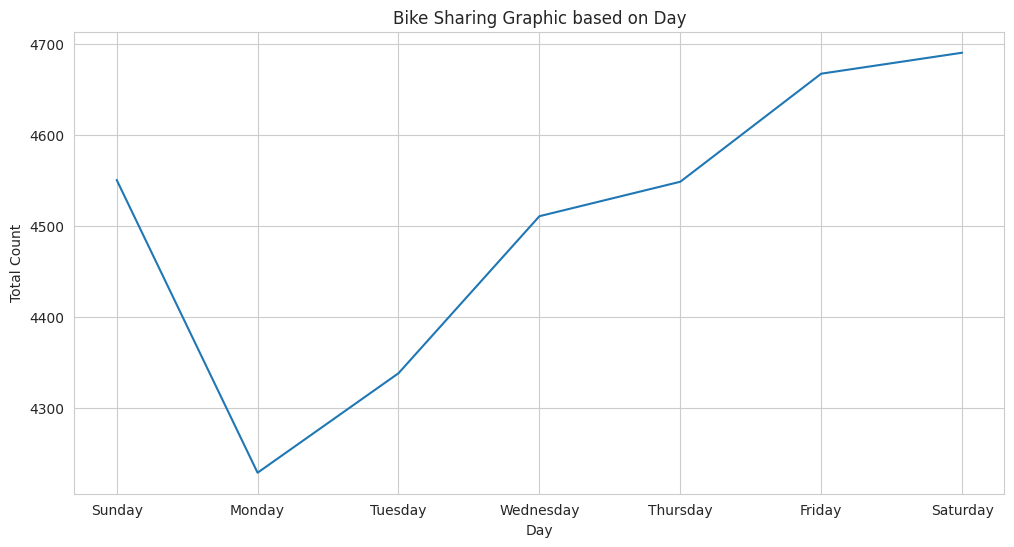

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="weekday", y="cnt", data=days_df, ci=None)
plt.title("Bike Sharing Graphic based on Day")
plt.xlabel("Day")
plt.ylabel("Total Count")
plt.show()

Bagaimana pola persewaan sepeda di setiap bulan?

-> Persewaan sepeda paling banyak pada bulan Juni dan paling sedikit pada bulan Januari

<ipython-input-61-7a85e04808d8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="mnth", y="cnt", data=days_df, ci=None)


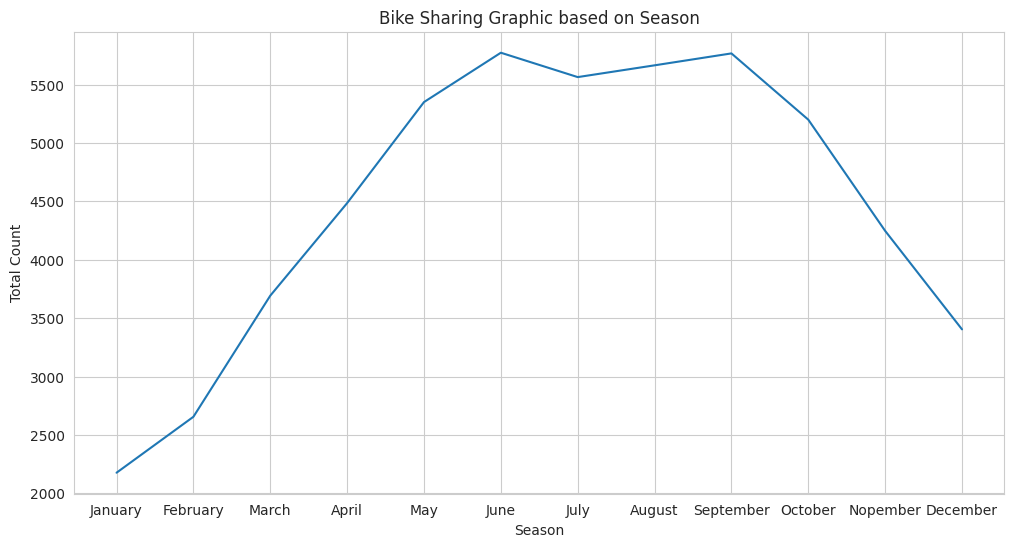

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="mnth", y="cnt", data=days_df, ci=None)
plt.title("Bike Sharing Graphic based on Month")
plt.xlabel("Month")
plt.ylabel("Total Count")
plt.show()


Bagaimana perbandingan penyewaan sepeda berdasarkan musim di tahun 2011 dan 2012?

Penyewaan sepeda tahun 2012 lebih banyak dari pada tahun 2011, dan paling banyak terjadi pada musim gugur pada kedua tahun tersebut.

# New Section

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1200x800 with 0 Axes>

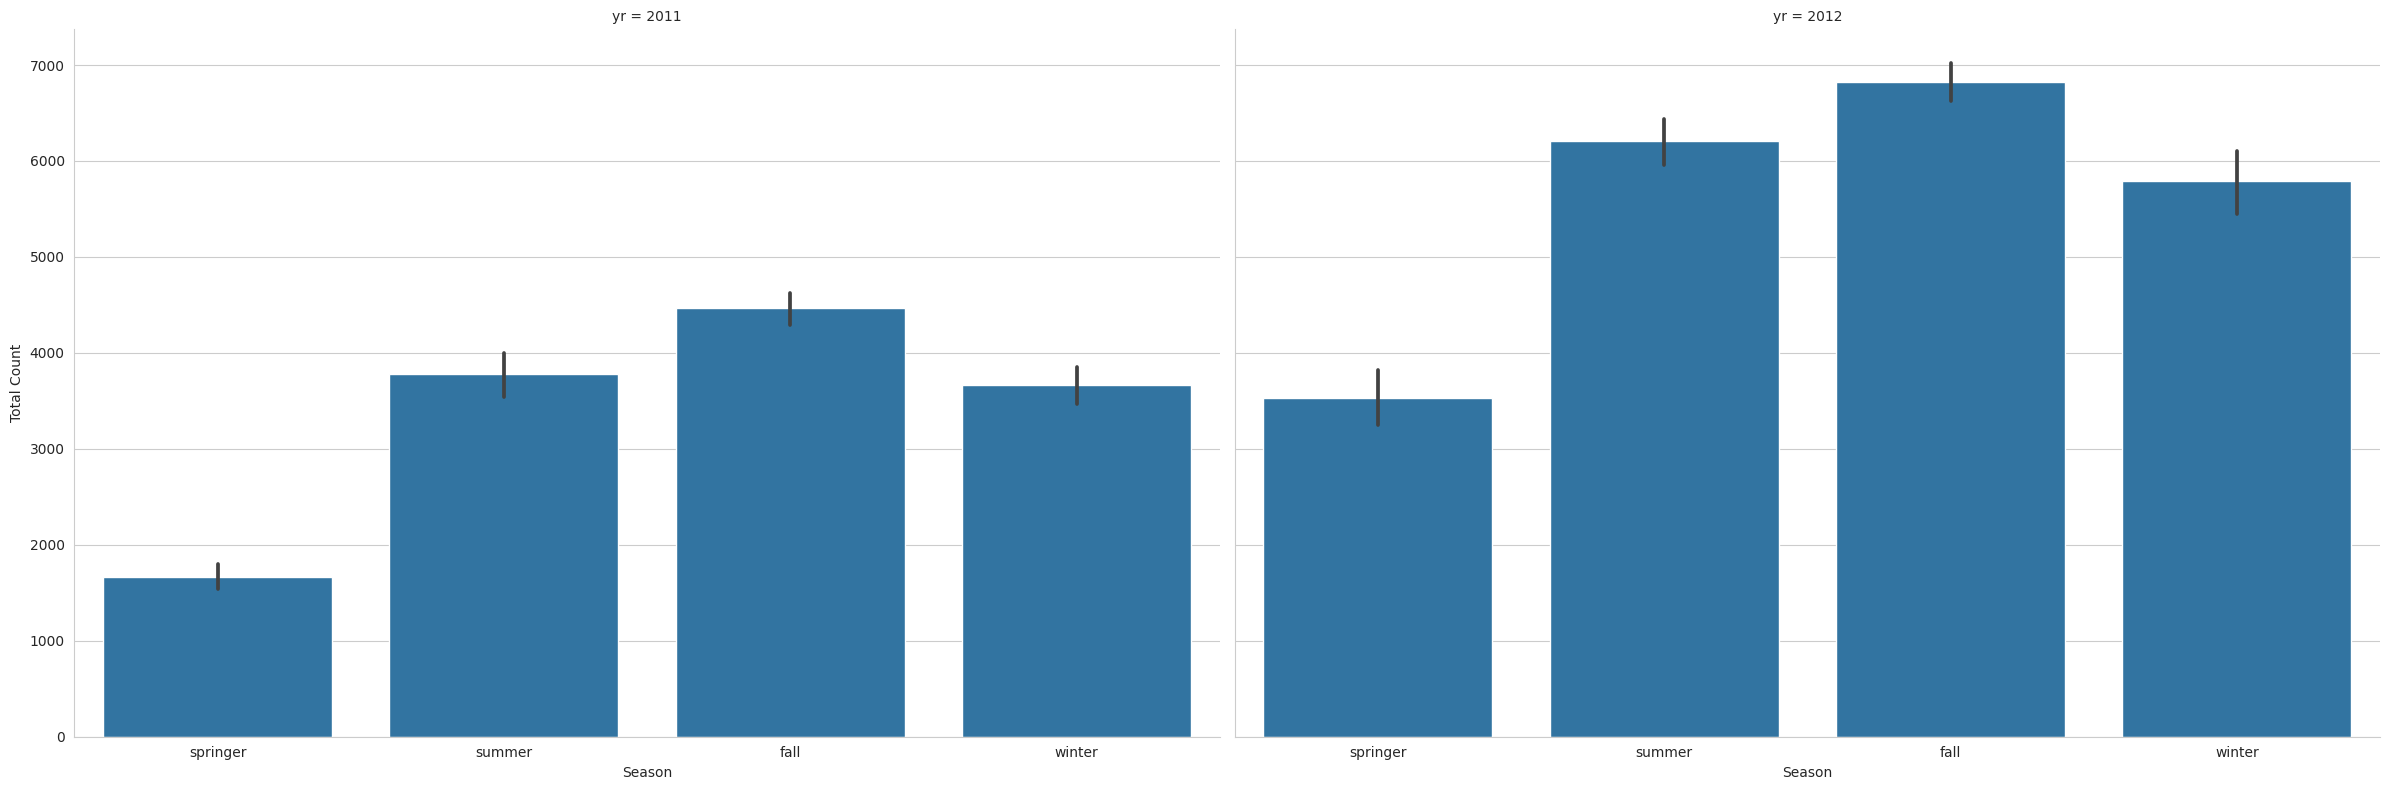

In [62]:
plt.figure(figsize=(12,8))
d = sns.FacetGrid(days_df, col="yr",height=8, aspect=1.5 )
d. map(sns.barplot, "season", "cnt")
d.set_axis_labels("Season", "Total Count")